In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [ ]:

import sys
import os

# Add the project root to sys.path (adjust the path as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(project_root)

# Now try to import the DataIngestion class
from src.components.data_ingestion import DataIngestion

# Initialize the DataIngestion object
ingestion = DataIngestion()

# Load data from the database
df_trucks = ingestion.load_dataframe('trucks_table')

# Display the data
print(df_trucks.head())



In [ ]:
df = df_trucks

In [4]:
df.shape

(1300, 5)

In [5]:
df.info

<bound method DataFrame.info of       truck_id  truck_age  load_capacity_pounds  mileage_mpg fuel_type
0     42302347         10                3000.0           17       gas
1     27867488         14               10000.0           22    diesel
2     13927774          8               10000.0           19       gas
3     69577118          8               20000.0           19       gas
4     28650047         10                4000.0           21    diesel
...        ...        ...                   ...          ...       ...
1295  17792974         11                4000.0           22    diesel
1296  17248432         11                6000.0           22    diesel
1297  21865328         10                3000.0           15       gas
1298  33564827         11               15000.0           24    diesel
1299  34755903         12                4000.0           25    diesel

[1300 rows x 5 columns]>

In [6]:
df.describe

<bound method NDFrame.describe of       truck_id  truck_age  load_capacity_pounds  mileage_mpg fuel_type
0     42302347         10                3000.0           17       gas
1     27867488         14               10000.0           22    diesel
2     13927774          8               10000.0           19       gas
3     69577118          8               20000.0           19       gas
4     28650047         10                4000.0           21    diesel
...        ...        ...                   ...          ...       ...
1295  17792974         11                4000.0           22    diesel
1296  17248432         11                6000.0           22    diesel
1297  21865328         10                3000.0           15       gas
1298  33564827         11               15000.0           24    diesel
1299  34755903         12                4000.0           25    diesel

[1300 rows x 5 columns]>

In [7]:
df.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


In [8]:
#Checking the null values
print(df.isnull().sum())

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type               40
dtype: int64


In [9]:
 df['load_capacity_pounds'].fillna(df['load_capacity_pounds'].mean(), inplace=True)

C:\Users\ritik\AppData\Local\Temp\ipykernel_26204\4165762347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['load_capacity_pounds'].fillna(df['load_capacity_pounds'].mean(), inplace=True)


In [10]:
df['fuel_type'].fillna(method='ffill', inplace=True)

C:\Users\ritik\AppData\Local\Temp\ipykernel_26204\3893353487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(method='ffill', inplace=True)
C:\Users\ritik\AppData\Local\Temp\ipykernel_26204\3893353487.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['fuel_type'].fillna(method='ffill', inplace=True)


In [11]:
#Checking the null values
print(df.isnull().sum())

truck_id                0
truck_age               0
load_capacity_pounds    0
mileage_mpg             0
fuel_type               0
dtype: int64


Hence filled all the numeric null values in load_capacity_pounds using mean method and categorical data iin the fuel_type by forward fill method

In [12]:
#checking the duplicate values
df.duplicated().sum()

np.int64(0)

Hence no duplicate values

In [13]:
#Assessing the values to remove outliers

df.truck_age.value_counts()

truck_age
10    251
9     245
11    205
8     186
7     128
12    110
13     56
6      53
14     28
5      19
15      8
4       7
3       4
Name: count, dtype: int64

In [14]:
df.truck_age.value_counts().count()

np.int64(13)

<Axes: ylabel='truck_age'>

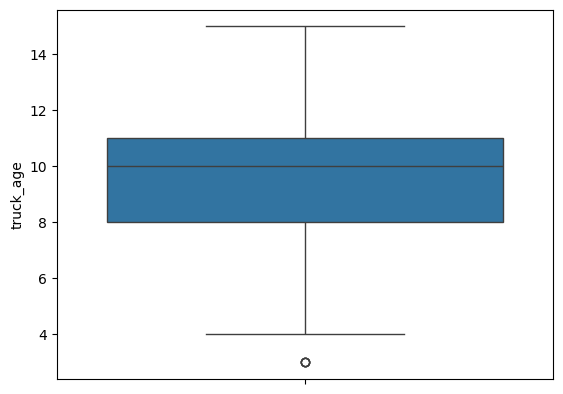

In [15]:
sns.boxplot(y=df['truck_age'])

We can remove outliers from here

In [16]:
df.load_capacity_pounds.value_counts()

load_capacity_pounds
3000.000000     294
15000.000000    289
4000.000000     203
6000.000000     199
10000.000000    168
20000.000000     90
8610.619469      57
Name: count, dtype: int64

In [17]:
df.load_capacity_pounds.value_counts().count()

np.int64(7)

<Axes: ylabel='load_capacity_pounds'>

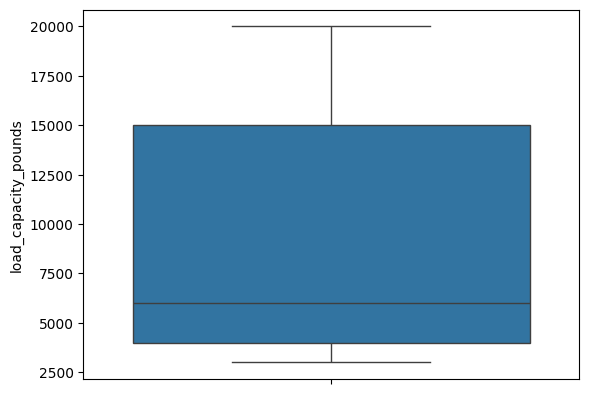

In [18]:
sns.boxplot(y=df['load_capacity_pounds'])

In [19]:
df.mileage_mpg.value_counts()

mileage_mpg
24    149
22    126
17    125
23    124
19    108
25     99
18     99
16     98
20     83
21     82
26     62
15     48
27     33
14     22
28     20
13     14
29      4
12      3
11      1
Name: count, dtype: int64

In [20]:
df.mileage_mpg.value_counts().count()

np.int64(19)

In [27]:
df.mileage_mpg.value_counts()


mileage_mpg
24    149
22    126
17    125
23    124
19    108
25     99
18     99
16     98
20     83
21     82
26     62
15     48
27     33
14     22
28     20
13     14
29      4
12      3
11      1
Name: count, dtype: int64

<Axes: ylabel='mileage_mpg'>

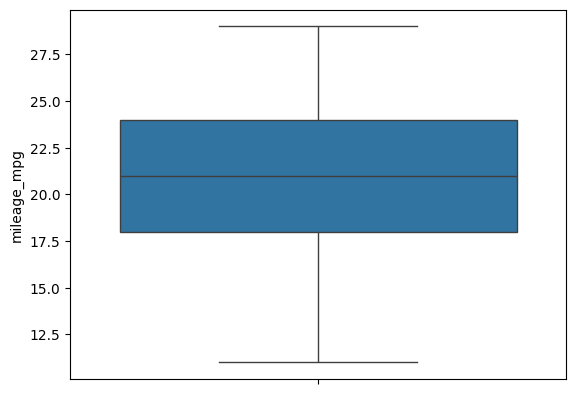

In [21]:
sns.boxplot(y=df['mileage_mpg'])

In [22]:
# Columns from where outliers need to be removed
columns_to_check = ['mileage_mpg','load_capacity_pounds','truck_age']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)

      truck_id  truck_age  load_capacity_pounds  mileage_mpg fuel_type
0     42302347         10                3000.0           17       gas
1     27867488         14               10000.0           22    diesel
2     13927774          8               10000.0           19       gas
3     69577118          8               20000.0           19       gas
4     28650047         10                4000.0           21    diesel
...        ...        ...                   ...          ...       ...
1295  17792974         11                4000.0           22    diesel
1296  17248432         11                6000.0           22    diesel
1297  21865328         10                3000.0           15       gas
1298  33564827         11               15000.0           24    diesel
1299  34755903         12                4000.0           25    diesel

[1296 rows x 5 columns]


In [23]:
#rename the df
df7 = df_cleaned

# Adding a new index column with a different name
df7.insert(0, 'RowIndex', range(1, 1 + len(df7)))

# Display the DataFrame with the new index column
print(df7)

      RowIndex  truck_id  truck_age  load_capacity_pounds  mileage_mpg  \
0            1  42302347         10                3000.0           17   
1            2  27867488         14               10000.0           22   
2            3  13927774          8               10000.0           19   
3            4  69577118          8               20000.0           19   
4            5  28650047         10                4000.0           21   
...        ...       ...        ...                   ...          ...   
1295      1292  17792974         11                4000.0           22   
1296      1293  17248432         11                6000.0           22   
1297      1294  21865328         10                3000.0           15   
1298      1295  33564827         11               15000.0           24   
1299      1296  34755903         12                4000.0           25   

     fuel_type  
0          gas  
1       diesel  
2          gas  
3          gas  
4       diesel  
...      

In [25]:
df7['event_time']= pd.to_datetime('2024-09-17')

In [28]:
!pip install hopsworks


In [29]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
2024-09-19 15:33:36,432 WARNING: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead

2024-09-19 15:33:36,433 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


In [30]:
trucks_table_fg = fs.get_or_create_feature_group(
    name="trucks_table",
    version=1,
    description="trucks_table",
    primary_key=['RowIndex'],
    event_time='event_time',
    
)

In [31]:
trucks_table_fg.insert(df7)

2024-09-19 15:36:48,567 WARNING: FeatureGroupWarning: The ingested dataframe contains upper case letters in feature names: `['RowIndex']`. Feature names are sanitized to lower case in the feature store.

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1043610/fs/1035337/fg/1202540


Uploading Dataframe: 0.00% |          | Rows 0/1296 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: trucks_table_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1043610/jobs/named/trucks_table_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x257521668a0>, None)

In [26]:
df7.to_csv('df7.csv', index=False)